<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/Linear_Regression_part_2_20_02_2024_%26_21_02_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.formula.api as smf # for Linear Regression


In [ ]:
# Upload dataset - wc-at.csv
# reading a csv file using pandas library
wcat=pd.read_csv("wc-at.csv")
pd.set_option('display.min_rows', None)

In [ ]:
# To know the number of rows and columns
wcat.shape

(109, 2)

In [ ]:
# Printing the dataset
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
5,71.85,21.68
6,80.90,29.08
7,83.40,32.98
8,63.50,11.44
9,73.20,32.22


In [ ]:
# To understand the basic stats of the dataset
wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [ ]:
# To check for null values
wcat.info()
wcat.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


Waist    0
AT       0
dtype: int64

In [ ]:
# To idnetify the names of the columns
wcat.columns

Index(['Waist', 'AT'], dtype='object')

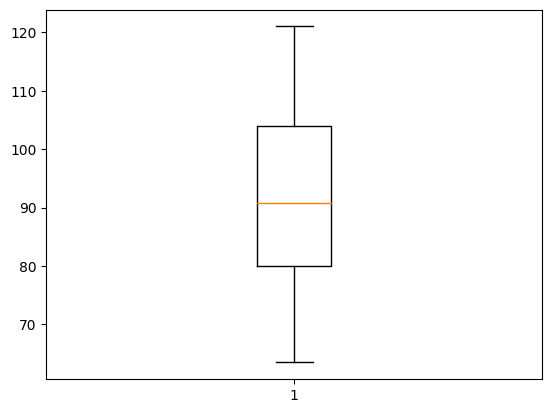

In [ ]:
# Following visualizations to understand data distribution
plt.boxplot(wcat.Waist)
plt.show()

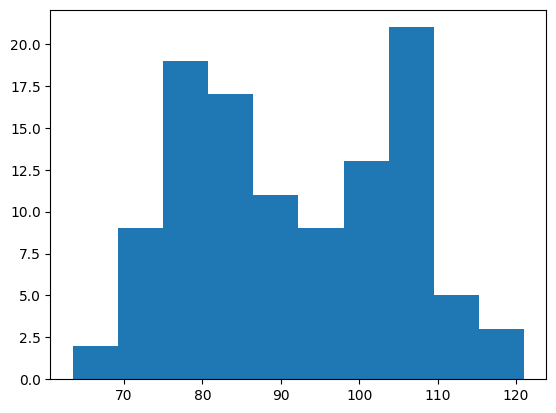

In [ ]:
# Following visualizations to understand data distribution
plt.hist(wcat.Waist)
plt.show()

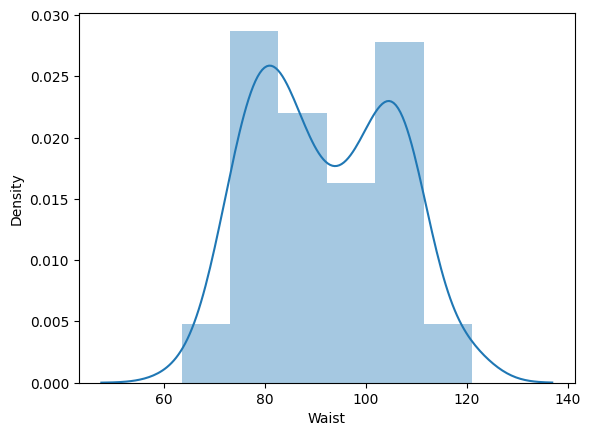

In [ ]:
# Following visualizations to understand data distribution
sns.distplot(wcat['Waist'])
plt.show()

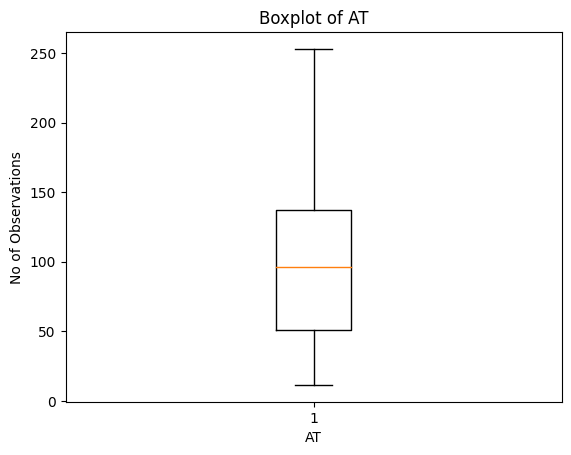

In [ ]:
# Following visualizations to understand data distribution
plt.boxplot(wcat.AT)
plt.xlabel("AT")
plt.ylabel("No of Observations")
plt.title("Boxplot of AT")
plt.show()

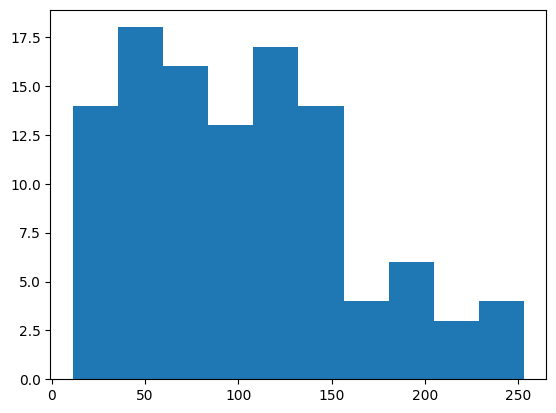

In [ ]:
# Following visualizations to understand data distribution
plt.hist(wcat.AT)
plt.show()

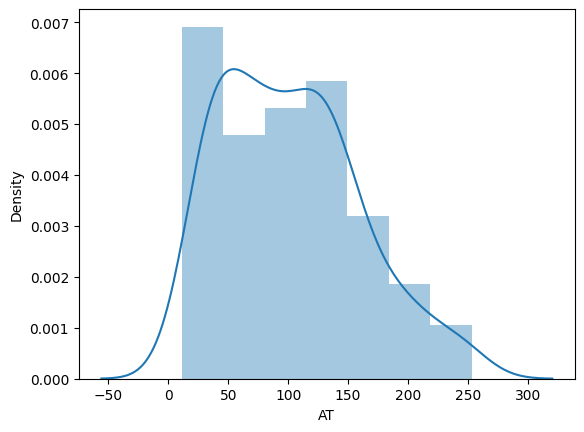

In [ ]:
# Following visualizations to understand data distribution
sns.distplot(wcat['AT'])
plt.show()

Text(0.5, 1.0, 'ScatterPlot')

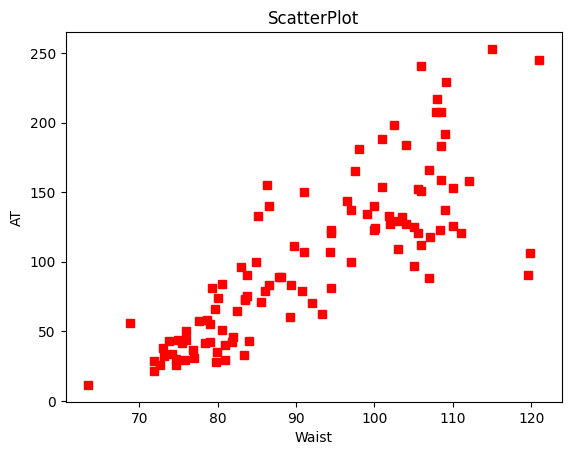

In [ ]:
# Creating a scatter plot to understand the linear association between the variables
plt.plot(wcat.Waist,wcat.AT,"rs")
plt.xlabel("Waist")
plt.ylabel("AT")
plt.title("ScatterPlot")
#help(plt.plot)

We can see that there is a positive linear association between the variables

In [ ]:
# Understanding the strength of correlation between the 2 variables - x & y
wcat.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


0.81 correlation - there is a strong correlation between the variables

In [ ]:
#wcat.AT.corr(wcat.Waist)

In [ ]:
# wcat.corr()

In [ ]:
# Fitting the regression model
# We need to import the required function from the statsmodel library
# Now we need to build the model. Code for the same is explained below
# smf.ols <- statsmodels.formula and ols <- ordinary least square method
# smf.ols("_target variable_ ~ _independant variable_",data = _dataset_).fit()
# Creating the 1st model or Model 1 = Linear model
model=smf.ols("AT~Waist",data=wcat).fit()
#Coefficients or the Bo and B1 values, i.e, the weights in the equation y= Bo + B1x + e
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [ ]:
# We are getting all the information about the model -
# target variable, method used for the model, date-time, no. of obs, df of residuals, df of model, r2 value, adjusted r2 value,
# Bo as coef of intercept and B1 as coef of daily, p-value, etc
# R2 value gives us the accuracy value
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.62e-27
Time:                        14:32:13   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Using the model created, predicting the values
pred = model.predict(wcat.Waist)
#pred = model.predict(wcat.iloc[:,0])
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
5       32.537559
6       63.840237
7       72.487385
8        3.656083
9       37.207020
10      32.710502
11      43.432966
12      36.861134
13      57.268404
14      50.350685
15      22.160981
16      46.718883
17      40.492936
18      39.282335
19      46.545940
20      49.831856
21      63.840237
22      60.381377
23      92.548770
24      67.644982
25     102.233576
26      83.555735
27      62.456693
28      81.480420
29      69.374412
          ...    
79     161.034186
80     142.010459
81     164.493045
82     164.493045
83     171.410764
84     159.304756
85     143.739889
86     167.951905
87     159.304756
88     202.540498
89     161.034186
90     121.257303
91     148.928178
92     122.986732
93     110.880725
94     119.527873
95     147.198748
96     150.657608
97     126.445592
98      98.774717
99     138.551600
100    150.657608
101    161.380072
102    181.787342
103    133

In [ ]:
# This tells us the errors in our predictions, i.e, Residuals = Actual value - predicted value
model.resid

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
5     -10.857559
6     -34.760237
7     -39.507385
8       7.783917
9      -4.987020
10     -4.390502
11      0.427034
12      1.348866
13    -14.788404
14    -19.390685
15     33.619019
16     -2.938883
17     -7.082936
18      4.067665
19    -17.235940
20    -13.231856
21    -23.590237
22    -24.951377
23    -32.458770
24    -21.804982
25    -31.833576
26     -0.105735
27     21.843307
28     -2.590420
29     -4.624412
         ...    
79     30.965814
80    -10.010459
81    -38.493045
82    -11.493045
83    -13.410764
84     23.695244
85     40.260111
86    -46.951905
87     -0.304756
88     42.459502
89    -24.034186
90     43.742697
91      3.071822
92     58.013268
93    -29.930725
94     17.472127
95    -22.198748
96     90.342392
97      7.554408
98     51.225283
99     59.448400
100     0.342392
101    67.619928
102    71.212658
103    54.636689
104    -6.250337
105   -44.530093
106    -3.1303

In [ ]:
pred = model.predict(wcat.Waist)
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
5       32.537559
6       63.840237
7       72.487385
8        3.656083
9       37.207020
10      32.710502
11      43.432966
12      36.861134
13      57.268404
14      50.350685
15      22.160981
16      46.718883
17      40.492936
18      39.282335
19      46.545940
20      49.831856
21      63.840237
22      60.381377
23      92.548770
24      67.644982
25     102.233576
26      83.555735
27      62.456693
28      81.480420
29      69.374412
          ...    
79     161.034186
80     142.010459
81     164.493045
82     164.493045
83     171.410764
84     159.304756
85     143.739889
86     167.951905
87     159.304756
88     202.540498
89     161.034186
90     121.257303
91     148.928178
92     122.986732
93     110.880725
94     119.527873
95     147.198748
96     150.657608
97     126.445592
98      98.774717
99     138.551600
100    150.657608
101    161.380072
102    181.787342
103    133

In [ ]:
model.resid_pearson

array([-5.09550501e-01, -2.79501693e-01, -7.36526900e-01, -9.55385603e-01,
       -3.74486373e-01, -3.28370857e-01, -1.05127206e+00, -1.19484256e+00,
        2.35413067e-01, -1.50825045e-01, -1.32784262e-01,  1.29149997e-02,
        4.07944734e-02, -4.47253451e-01, -5.86442653e-01,  1.01675760e+00,
       -8.88821743e-02, -2.14212943e-01,  1.23020519e-01, -5.21275561e-01,
       -4.00177964e-01, -7.13451894e-01, -7.54617582e-01, -9.81667583e-01,
       -6.59459501e-01, -9.62759522e-01, -3.19781076e-03,  6.60618576e-01,
       -7.83434219e-02, -1.39858512e-01, -8.26468630e-03,  1.71170943e-02,
       -5.78950111e-01, -2.93076130e-01, -2.97057035e-01,  3.06042549e-01,
        2.48761552e-01, -3.41178084e-01,  4.02019198e-01, -5.40876395e-02,
        8.97412236e-03,  1.09123902e-01, -3.50119995e-01,  1.71753428e+00,
        7.69279067e-01, -1.10275004e+00, -9.64451677e-02,  3.66529597e-01,
        1.88429083e-01,  6.95115285e-01,  4.95265365e-01,  5.09877715e-01,
        1.64182014e+00, -

In [ ]:
#print(model.conf_int(0.05))

In [ ]:
# To find out the total error - we use Root mean square error (RMSE)
rmse_lin = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred))**2))
rmse_lin

32.760177495755144

In [ ]:
# Understanding RMSE -
# Error = Actual value - predicted value = (AV - PV)
# Squared error = (AV - PV)**2
# Mean squared error = (Σ(Av - PV)**2)/n , where n is the no. of Observation
# Root mean squared error = √((Σ(Av - PV)**2)/n)

Text(0, 0.5, 'TISSUE')

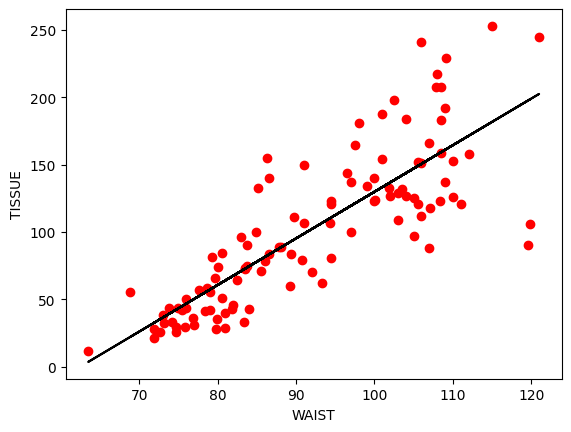

In [ ]:
# Plotting the predicted model using the scatter plot
# The red dots are the actual values and the black linear line is the predicted values
# This model has R2 vale of = 0.67 and RMSE value of = 32.76 as calculated above
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='red')
plt.plot(wcat['Waist'],pred,color='black')
plt.xlabel('WAIST')
plt.ylabel('TISSUE')

The issue with the above model is that we need to achieve R2 value of min = 0.75

To do that we need to apply transformations. The different transformations are -

1. Log Transformation
2. Exponential Transformation
3. Square or quadratic Transformation
4. Square root Transformation

or make a combination of the above transformations.
Basically, modify the equation by applying some mathematical functions. This is called as Transformations.

This helps us increase the R2 value and decreasing the Error. In this case RMSE value to be decreased.

In [ ]:
# 1st Transformation - Log transformation
# Regular eq => y= Bo + B1(x)
# after log transformation, = Bo + B1 log(x)
# This is the 2nd model we are creating
model2 = smf.ols('AT~np.log(Waist)',data=wcat).fit()
#model2.params
#model2.resid
#model2.resid_pearson


In [ ]:
# Summary of Model 2
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Mon, 27 May 2024   Prob (F-statistic):           6.80e-28
Time:                        14:32:35   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# After building the model, we make our predictions
pred2 = model2.predict(pd.DataFrame(wcat['Waist']))
pred2

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
5       27.279545
6       64.902356
7       74.554213
8      -11.899606
9       33.182963
10      27.500161
11      40.887040
12      32.749422
13      57.365321
14      49.233194
15      13.753591
16      44.878862
17      37.272314
18      35.771839
19      44.670014
20      48.614795
21      64.902356
22      60.957833
23      95.876103
24      69.185406
25     105.677983
26      86.494845
27      63.330429
28      84.289954
29      71.113288
          ...    
79     159.451269
80     143.031172
81     162.347504
82     162.347504
83     168.061813
84     157.993171
85     144.559539
86     165.217529
87     157.993171
88     192.573752
89     159.451269
90     124.092079
91     149.100938
92     125.714259
93     114.180786
94     122.461558
95     147.594352
96     150.600399
97     128.933937
98     102.211986
99     139.952162
100    150.600399
101    159.742085
102    176.444739
103    135

In [ ]:
# We find out the error in the log model or Model 2
rmse_log = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred2))**2))
rmse_log

32.49688490932126

In [ ]:
# Understanding the strength of correlation between the 2 variables - log(x) & y
pred2.corr(wcat.AT)

0.8217781862645351

Text(0, 0.5, 'TISSUE')

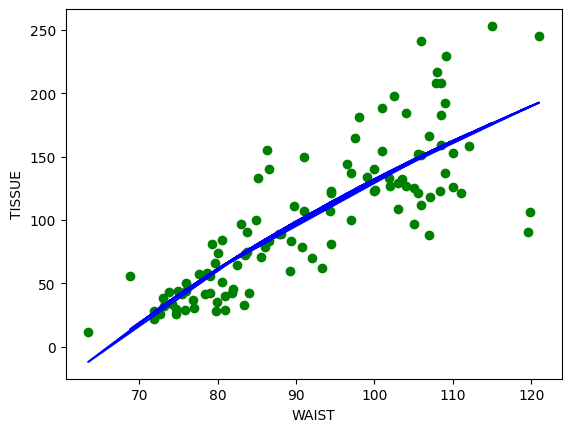

In [ ]:
# Plotting Model 2 - the green dots are actual values and the blue line is the predicted values
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green')
plt.plot(wcat['Waist'],pred2,color='blue')
plt.xlabel('WAIST')
plt.ylabel('TISSUE')

In [ ]:
# 2nd Transformation - Exponential  transformation
# Regular eq => y= Bo + B1(x)
# after exponential transformation, log(y)= Bo + B1(x) , i.e., y = e**(Bo+B1(x))
model3 = smf.ols('np.log(AT)~Waist',data=wcat).fit()
model3.params
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Mon, 27 May 2024   Prob (F-statistic):           2.68e-30
Time:                        14:32:37   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Using the model, we are making predictions
pred_log = model3.predict(pd.DataFrame(wcat['Waist']))

In [ ]:
# Printing the predictions of model 2
# The predicted values are very small as we are predicting log(y)
pred_log

0      3.749889
1      3.663346
2      4.033669
3      4.120211
4      3.745864
5      3.633157
6      3.997441
7      4.098072
8      3.297049
9      3.687498
10     3.635170
11     3.759952
12     3.683472
13     3.920962
14     3.840457
15     3.512400
16     3.798192
17     3.725738
18     3.711649
19     3.796179
20     3.834419
21     3.997441
22     3.957189
23     4.331536
24     4.041719
25     4.444243
26     4.226880
27     3.981340
28     4.202729
29     4.061845
         ...   
79     5.128534
80     4.907146
81     5.168787
82     5.168787
83     5.249292
84     5.108408
85     4.927272
86     5.209039
87     5.108408
88     5.611563
89     5.128534
90     4.665631
91     4.987651
92     4.685758
93     4.544874
94     4.645505
95     4.967525
96     5.007777
97     4.726010
98     4.403991
99     4.866894
100    5.007777
101    5.132560
102    5.370049
103    4.806515
104    4.770288
105    4.496571
106    4.838717
107    5.084257
108    5.108408
Length: 109, dtype: floa

In [ ]:
# We are taking exponential values of the above predicted log(y) to get the Y value
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
5       37.832062
6       54.458630
7       60.224086
8       27.032754
9       39.944768
10      37.908280
11      42.946367
12      39.784304
13      50.448940
14      46.546737
15      33.528629
16      44.620431
17      41.501829
18      40.921236
19      44.530718
20      46.266541
21      54.458630
22      52.310071
23      76.061058
24      56.924111
25      85.135421
26      68.503177
27      53.588815
28      66.868544
29      58.081384
          ...    
79     168.769572
80     135.252851
81     175.701533
82     175.701533
83     190.431312
84     165.406833
85     138.002556
86     182.918215
87     165.406833
88     273.571587
89     168.769572
90     106.232649
91     146.591651
92     108.392370
93      94.148585
94     104.115960
95     143.670808
96     149.571875
97     112.844427
98      81.776569
99     129.916714
100    149.571875
101    169.450279
102    214.873357
103    122

In [ ]:
# We find out the error in the exponential model or Model 3
rmse_exp = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred3))**2))
rmse_exp

38.52900175807143

In [ ]:
# Understanding the strength of correlation between the 2 variables - x & log(y)
pred3.corr(wcat.AT)

0.7633804583650525

Text(0, 0.5, 'TISSUE')

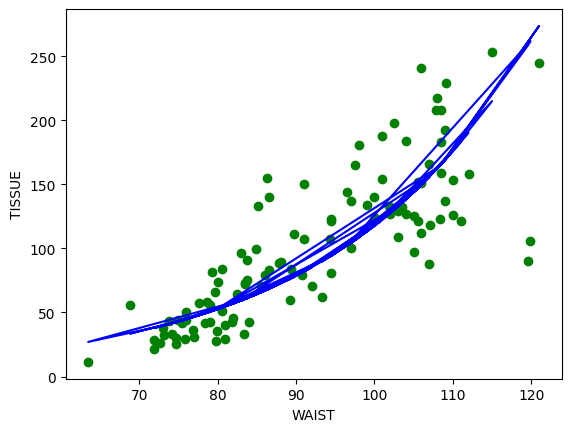

In [ ]:
# Plotting Model 3 - the green dots are actual values and the blue line is the predicted values
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green')
plt.plot(wcat.Waist,pred3,color='blue')
plt.xlabel('WAIST')
plt.ylabel('TISSUE')


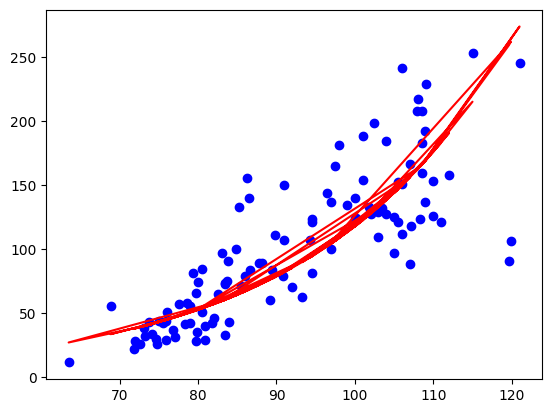

In [ ]:
plt.plot(wcat['Waist'],wcat['AT'], 'bo')
plt.plot(wcat.Waist,pred3,color='red')

In [ ]:
student_resid = model3.resid_pearson
student_resid

array([-1.42426841, -1.16036536, -0.79857367, -1.03053611, -0.99183029,
       -1.57770329, -1.77782943, -1.7063649 , -2.43678253, -0.60898882,
       -0.82630708,  0.05965107, -0.11441073, -0.48719133, -1.15546702,
        1.44239166, -0.05388192, -0.61457662,  0.16338349, -1.18519137,
       -0.66413371, -0.85671265, -1.10408983, -0.66788034, -0.61366891,
       -0.53854217,  0.559278  ,  1.28377825,  0.46848176,  0.30798929,
        0.51662718,  0.58049434, -0.07722426,  0.24329581, -0.00731172,
        0.71101855,  0.76180321, -0.07709724,  0.97229834,  0.26937281,
        0.53880043,  0.34505495, -0.14698466,  2.03681962,  1.38280011,
       -0.79731502,  0.38539598,  0.75747349,  0.67811133,  1.31762395,
        1.00267879,  1.11566466,  2.03975207, -0.12692781, -0.4705888 ,
        0.44867784,  0.60008028,  2.34805258,  0.21771996,  0.59055788,
        0.50813615,  1.25820146, -1.76365553, -0.81659309, -2.97779536,
       -2.56121918,  0.97601914, -0.5436722 , -1.10931613,  0.18

Text(0, 0.5, 'Standardized Residual')

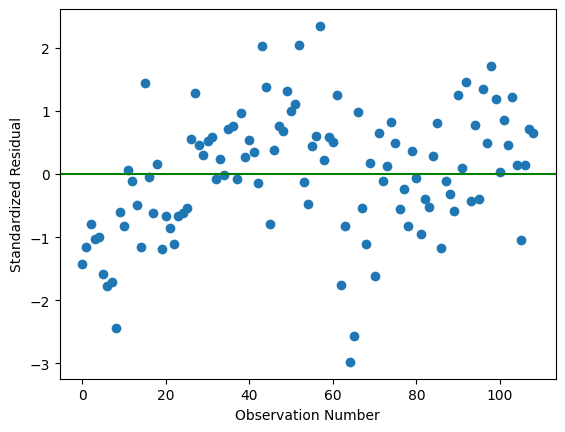

In [ ]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

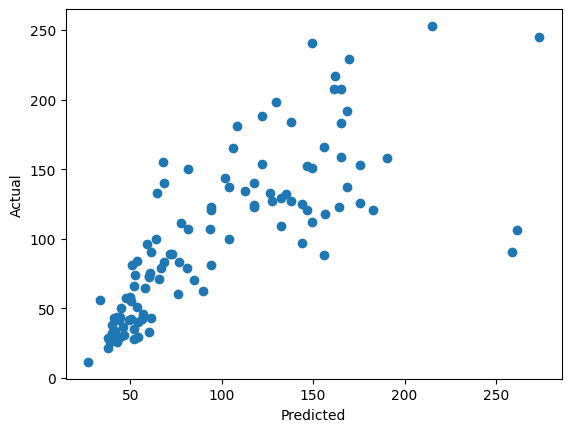

In [ ]:
plt.scatter(x=pred3,y=wcat.AT)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
# 3rd Transformation - Combination of exponential and quadratic model
# Regular eq => y= Bo + B1(x)
# after exponential transformation, log(y)= Bo + B1(x) + B2(x)**2

# Here we are squaring x = Waist
wcat["Waist_Sq"] = wcat.Waist*wcat.Waist
wcat

,Waist,AT,Waist_Sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225
5,71.85,21.68,5162.4225
6,80.90,29.08,6544.8100
7,83.40,32.98,6955.5600
8,63.50,11.44,4032.2500
9,73.20,32.22,5358.2400


In [ ]:
# Creating the model using ordinary least square
model_quad = smf.ols("np.log(AT)~Waist+Waist_Sq",data=wcat).fit()
#model_quad.params

In [ ]:
# Summary of Model 4
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.80e-35
Time:                        14:32:49   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_Sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Using the model created, predicting the values
pred_quad = model_quad.predict(wcat)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4


0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
5       29.174597
6       56.804132
7       66.309110
8       13.610862
9       32.565621
10      29.295590
11      37.491210
12      32.305552
13      50.075256
14      43.505263
15      22.548823
16      40.277322
17      35.107507
18      34.156014
19      40.127488
20      43.034658
21      56.804132
22      53.205658
23      90.409485
24      60.901036
25     102.467180
26      79.346903
27      55.349922
28      76.842525
29      62.808612
          ...    
79     155.642311
80     144.980610
81     156.625326
82     156.625326
83     157.645795
84     155.034904
85     146.290109
86     157.294508
87     155.034904
88     146.783920
89     155.642311
90     125.093851
91     149.832482
92     126.995763
93     113.052967
94     123.157825
95     148.717813
96     150.878818
97     130.687397
98      98.166004
99     142.179763
100    150.878818
101    155.754580
102    156.780640
103    137

In [ ]:
# We find out the error in the quadratic model or Model 4
rmse_quad = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred4))**2))
rmse_quad

32.24444782776221

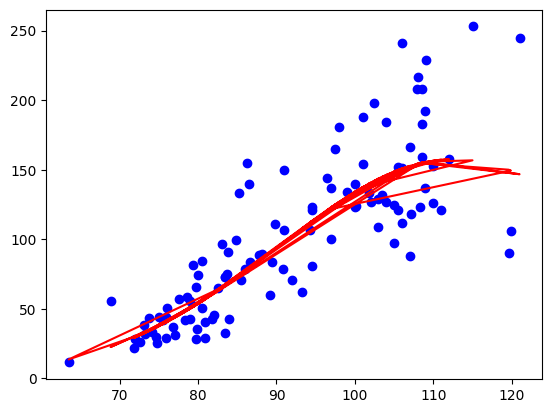

In [ ]:
# Plotting Model 4 - the blue dots are actual values and the red line is the predicted values
plt.scatter(wcat.Waist,wcat.AT,c="b")
plt.plot(wcat.Waist,pred4,"r")

Text(0, 0.5, 'Standardized Residual')

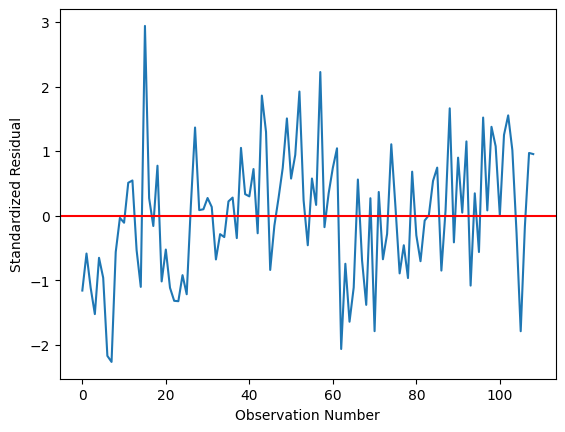

In [ ]:
# Plotting Model 4 residuals -
plt.plot(np.arange(109),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Standardized Residual')

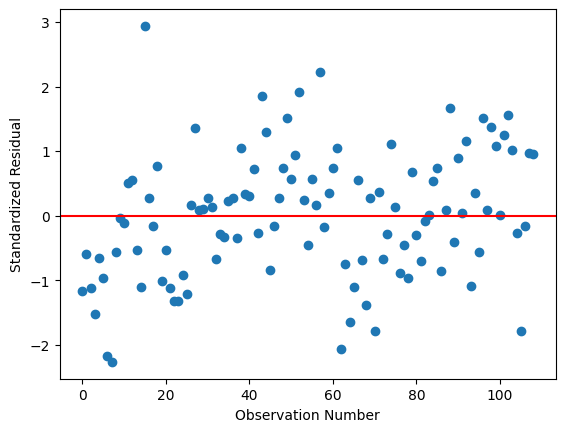

In [ ]:
# Model validation Technique using a scatter plot
# Using a scatter plot, we plot the standardized residuals (errors) using the code .resid_pearson, the '_pearson' standardises the residuals to be plotted
# If we take the mean of most of the standardized residual values, we'll get 0.
# They also have constant variance from the mean
# therefore, mean = 0, and constant variance from the mean confirms that the model is a valid model
plt.scatter(np.arange(109),model_quad.resid_pearson)
plt.axhline(y=0,color='red') # Creating a reference line at point 0 in red
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [ ]:
# In the above plot, the observations lying far away from the mean value are known as outliers.
# We can build a better model if the outliers are handled.

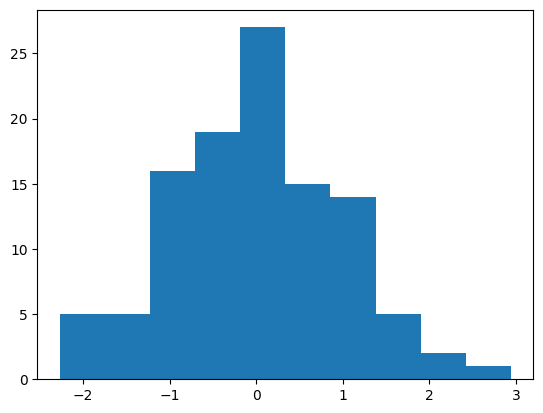

In [ ]:
plt.hist(model_quad.resid_pearson)
plt.show()

In [ ]:
# Listing all the 4 models with their RMSE (error) values and R2 values
# First creating a dictionary with 3 columns - model, error value and R2 values
# Converting the dictionary into dataframe and printing it
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,32.760177,0.670037
1,rmse_log,32.496885,0.675319
2,rmse_exp,38.529002,0.707114
3,rmse_quad,32.244448,0.778982


In [ ]:
# Based on the above table we can infer that, Quadratic model has the least RMSE (error) value and highest accurarcy (min required accurarcy is 0.75)
# So, Quadratic model is the best model

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

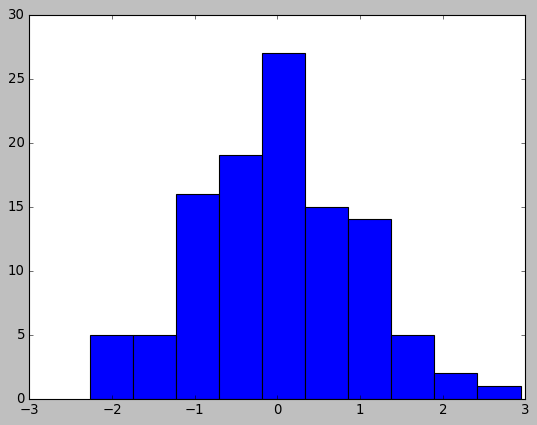

In [ ]:
plt.hist(model_quad.resid_pearson)
plt.show()

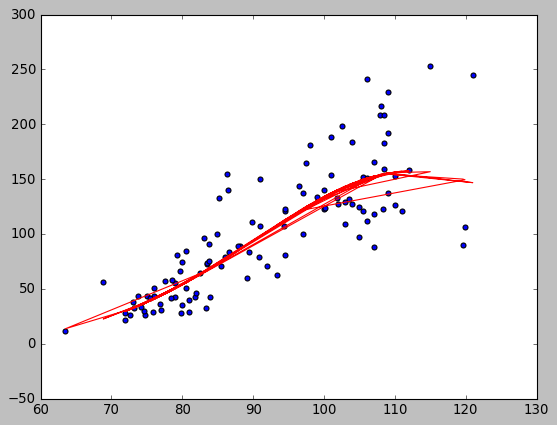

In [ ]:
plt.scatter(wcat.Waist,wcat.AT,c="b")
plt.plot(wcat.Waist,pred4,"r")